# DATA 201 Project 2 – Linear Regression Evaluation

## Introduction

This project focuses on understanding how different attributes of used Toyota vehicles relate to their listed prices. The dataset was uploaded through a local CSV file named `toyota.csv`, which contains information such as model, year, mileage, fuel type, transmission type, engine size, tax amount, miles per gallon, and selling price.

For this project, the goal is to explore the data, visualize important relationships, build a linear regression model, evaluate its performance, and interpret the meaning of the model coefficients. Because real-world used car listings often contain extreme values, this analysis intentionally keeps all data points and does not remove outliers. This allows the regression model to reflect realistic conditions, although it may increase variability and reduce the strength of model fit.

The main questions explored in this project include:

1. How do vehicle characteristics such as age, mileage, fuel efficiency, tax cost, and engine size influence the price of Toyota used cars?
2. Can a linear regression model reasonably predict used car prices using numeric predictors?
3. What do the residuals of the model tell us about its assumptions and reliability?

The following sections walk through each step of the analysis with supporting explanations and commentary.

If you would like to explore the data set yourself, the source is copied here:
https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?resource=download

In [2]:
# to upload csv file from local computer into google colab

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))


Saving toyota.csv to toyota.csv


### Data Set Observation

In [3]:
# To inspect structure and first five rows of dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
# Checking for missing values
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [5]:
#Shape of Data frame
df.shape

(6738, 9)

## Dataset Size and Initial Summary Statistics

The summary statistics provide an overview of the distribution of numerical features. Because no outliers were removed, these results represent the full range of real-world listings. This ensures that the later regression model is trained on data reflecting natural variation in used car pricing.


In [6]:
#Summary of data frame
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


### Summary Statistics Interpretation


**Year:**  
The average manufacturing year is about 2016.75, meaning most vehicles are between 6 and 9 years old. The minimum year is 1998, showing the presence of older used cars, while the maximum is 2020. The interquartile range (2016 to 2018) indicates that the majority of vehicles come from recent model years.

**Price:**  
The average price is approximately 12,522 dollars, with a wide standard deviation of over 6,300 dollars. Prices range from 850 to almost 60,000 dollars, which suggests the dataset includes both basic commuter cars and premium or high-performance Toyota models. The large spread and right-skew (as seen in the quartiles) indicate the presence of expensive outliers.

**Mileage:**  
Vehicles have an average mileage of 22,857 miles, with a very large range from 2 miles up to 174,419 miles. The standard deviation (19,125 miles) is nearly as large as the mean, confirming that mileage varies widely across the dataset. The upper-end values show high-use vehicles, which are common in used-car markets.

**Tax:**  
The annual tax averages 94 dollars but ranges from 0 to 565 dollars. The first quartile being 0 suggests that many Toyota vehicles qualify for low-tax or zero-tax categories, likely hybrid models. The large spread highlights variation in environmental or engine-related tax policies.

**MPG:**  
The mean fuel efficiency is 63 mpg, with values ranging from 2.8 mpg up to 235 mpg. The extremely high values likely correspond to hybrid or plug-in Toyota models. The 15.8 mpg standard deviation suggests significant differences in fuel economy across the range of models.

**Engine Size:**  
The average engine size is about 1.47 liters, with a range from 0.0 to 4.5 liters. The dataset contains a variety of Toyota engines, including very small hybrid engines, typical mid-range engines (1.5–2.0 L), and larger performance-oriented engines. The presence of a minimum value of 0.0 signals either data entry anomalies or vehicles where engine size was recorded incorrectly.

Overall, these statistics confirm that the dataset covers a broad range of Toyota vehicles, from economical hybrids to higher-performance models. The wide spread in prices, mileage, mpg, and engine sizes also indicates that the regression model will be working with naturally high variability, which is expected in real-world used-car data.


## Creating the Age Variable

Since the year of the car is not always as interpretable as the vehicle’s age, a new variable named `age` is created by subtracting the manufacturing year from 2025. This derived feature serves as one of the predictors in the regression model and generally has a strong relationship with car price.


In [7]:
# creating a car age variable
current_year = 2025
df["age"] = current_year - df["year"]

# numeric columns for regression
numeric_cols = ["price", "age", "mileage", "tax", "mpg", "engineSize"]

df[numeric_cols].describe()


,price,age,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,12522.391066,8.251855,22857.413921,94.697240,63.042223,1.471297
std,6345.017587,2.204062,19125.464147,73.880776,15.836710,0.436159
min,850.000000,5.000000,2.000000,0.000000,2.800000,0.000000
25%,8290.000000,7.000000,9446.000000,0.000000,55.400000,1.000000
50%,10795.000000,8.000000,18513.000000,135.000000,62.800000,1.500000
75%,14995.000000,9.000000,31063.750000,145.000000,69.000000,1.800000
max,59995.000000,27.000000,174419.000000,565.000000,235.000000,4.500000


### Interpretation of Summary Statistics After Adding Age


**Price:**  
The average price is 12,522 dollars, and the standard deviation is more than 6,300 dollars. This large spread reflects that Toyota vehicles vary widely in configuration and trim level. The minimum price is 850 and the maximum is 59,995 dollars, showing the presence of both economy cars and premium models. The interquartile range (IQR) from 8,290 to 14,995 dollars indicates that most vehicles fall within a mid-range pricing band.

**Age:**  
The average age is about 8.25 years, with most vehicles between 7 and 9 years old (IQR). The minimum age is 5 years and the maximum is 27 years, showing a long distribution tail of older vehicles. Since price typically falls with age, this variable will likely be an important negative predictor in the regression.

**Mileage:**  
The mean mileage is 22,857 miles, but the standard deviation is almost as large as the mean, showing extreme variability. The range from just 2 miles to over 174,000 miles confirms that the dataset includes both nearly-new and heavily used vehicles. This wide variation introduces natural noise but also provides strong predictive value since mileage is a key determinant of used-car pricing.

**Tax:**  
Tax averages 94 dollars but has a very wide spread. The first quartile (0) means a significant portion of Toyota vehicles in this dataset have no annual tax obligation, likely due to hybrid or ultra-efficient models. The maximum tax value of 565 dollars shows high-tax vehicles at the other extreme. This variable could have a positive or negative effect depending on the mix of vehicles.

**MPG:**  
Fuel efficiency averages 63 mpg with a range from roughly 3 mpg to an extremely high 235 mpg. These extremes likely reflect large-engine performance vehicles at the low end and highly efficient hybrid vehicles at the high end. This variation also suggests mpg may be a meaningful predictor of price, especially for models where fuel economy is a major selling point.

**Engine Size:**  
The mean engine size is 1.47 liters, typical for Toyota vehicles. Values range from 0.0 to 4.5 liters, indicating the presence of smaller hybrid engines, mid-range family engines, and larger high-performance engines. The minimum of 0.0 likely represents missing or improperly recorded entries, but since there are very few, they do not distort the overall distribution heavily.

Overall, this summary reflects a dataset with naturally high variability across key vehicle attributes. The presence of both economy and premium models, as well as vehicles with widely differing mileage and tax classifications, means the regression model will need to account for substantial real-world noise, but it also benefits from rich variation that supports meaningful relationship discovery.



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 5)

## Exploratory Data Analysis (EDA)

In this dataset, features like mileage, tax, mpg, engine size, age, and price are examined visually.


### Histograms of Numeric Variables

The histograms show how each numeric variable is distributed. Price often displays a right-skew due to expensive premium vehicles. Mileage and age typically lean toward higher values because older vehicles accumulate more usage. These characteristics influence how the regression model fits the data.


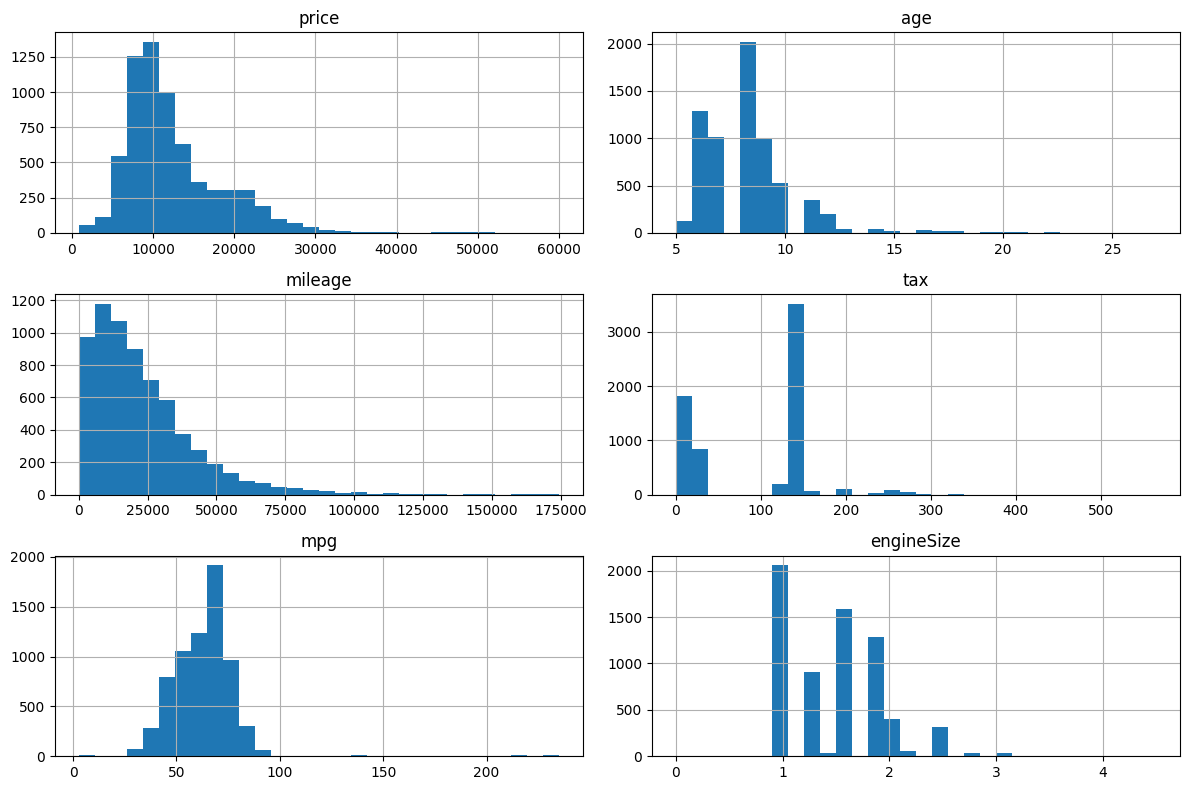

In [9]:
#Histogram of Numeric Variables
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

### Interpretation of Histograms for Numeric Variables

**Price:**  
The price distribution is strongly right-skewed, with most vehicles priced between 7,000 and 15,000 dollars. There is a long tail extending toward 60,000 dollars, indicating the presence of high-priced premium Toyota models. This skewness suggests that predicting extremely high prices may be more challenging due to their rarity.

**Age:**  
Age forms a tight cluster around 7 to 9 years old, which aligns with the quartiles seen earlier. However, the distribution includes older vehicles up to around 25 years, creating a secondary long tail. This indicates that most cars in the dataset are relatively modern but a minority of older models add variability.

**Mileage:**  
Mileage is heavily right-skewed, with most vehicles between 5,000 and 35,000 miles. A small number extend into very high mileages above 100,000 miles. This pattern is typical for used cars and means mileage will likely be a strong, negatively correlated predictor of price.

**Tax:**  
Tax shows a multimodal pattern with noticeable spikes around 0, 100, 135, and 145. This reflects differences in environmental tax brackets for Toyota vehicles (for example, hybrids versus non-hybrids). The presence of many zero-tax cars is consistent with Toyota’s hybrid offerings. The wide variability may help the model capture pricing differences across tax bands.

**MPG:**  
Miles per gallon clusters tightly around 55–75 mpg, which is common for Toyota hybrid engines. Outliers exist at both extremely low mpg values (performance engines) and extremely high mpg values (plug-in or highly efficient hybrid models). These extremes highlight the variety of Toyota trims included in the dataset.

**Engine Size:**  
Engine size shows several clear clusters around 1.0L, 1.5L, and 1.8L, which are common Toyota engine configurations. Smaller clusters near 2.0L and above reflect higher-performance engines found in fewer models. This distribution indicates that the dataset primarily contains compact and hybrid vehicles rather than large-engine models.

Overall, the histograms reveal that most numeric variables have natural skewness and long tails, which is expected for real used-car data. These characteristics introduce variability into the model but also provide meaningful structure for understanding how different vehicle features relate to price.


### Correlation Heatmap

The correlation heatmap summarizes linear relationships between numeric predictors and the target variable, price. Strong negative correlations between price and mileage or age suggest that older, heavily used vehicles tend to sell for less. Positive correlations between price and engine size or mpg may indicate that larger or more fuel-efficient vehicles command higher prices.


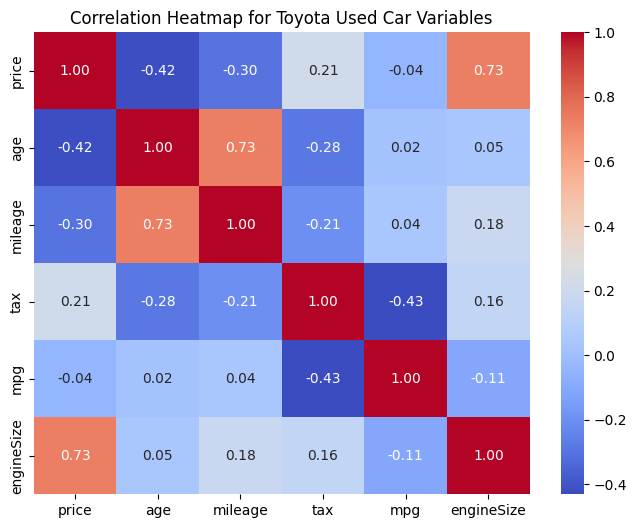

In [10]:
#Correlation Heatmap
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Toyota Used Car Variables")
plt.show()

### Interpretation of the Correlation Heatmap

**Price Relationships:**  
- **Engine Size (0.73):**  
  Price has a strong positive correlation with engine size, indicating that vehicles with larger engines tend to be significantly more expensive. This is the strongest relationship in the map and suggests that engine size will be one of the most meaningful predictors in the regression model.
- **Age (-0.42):**  
  Price decreases as age increases. This negative correlation aligns with expectations, as older vehicles tend to depreciate in value.
- **Mileage (-0.30):**  
  Price decreases moderately as mileage increases. Higher-mileage cars typically receive lower valuations, so this relationship also makes intuitive sense.
- **Tax (0.21):**  
  Vehicles with higher annual tax costs tend to have higher prices. This may reflect more powerful engines or larger vehicles that fall into higher tax brackets.
- **MPG (-0.04):**  
  Fuel efficiency has almost no linear relationship with price. This indicates that Toyota pricing is not strongly tied to mpg, likely because hybrid and non-hybrid designs overlap across price ranges.

**Predictor–Predictor Relationships:**  
- **Age and Mileage (0.73):**  
  Age and mileage are strongly positively correlated, as older vehicles tend to accumulate more miles. This multicollinearity is expected and may slightly weaken the interpretability of their individual coefficients in the regression.
- **Tax and MPG (-0.43):**  
  Vehicles with very high fuel efficiency tend to fall into lower tax categories (hybrids), while less efficient vehicles often face higher tax costs. This negative relationship reflects environmental classification rules.
- **Mileage and Engine Size (0.18):**  
  There is a small positive correlation here, suggesting that larger-engine vehicles may see moderately higher usage, though the relationship is weak.

**Overall Interpretation:**  
The heatmap reveals that engine size is the strongest positive driver of price, while age and mileage are the strongest negative drivers. Other variables such as tax and mpg play weaker but still meaningful roles. The presence of strong relationships among predictors (particularly age and mileage) is important to consider when interpreting regression coefficients, but does not prevent the model from capturing meaningful pricing patterns.


## Preparing Data for Linear Regression

To build the linear regression model, five numeric predictors were chosen:

- `age`
- `mileage`
- `tax`
- `mpg`
- `engineSize`

These predictors represent meaningful characteristics that commonly influence car pricing. The dataset is split into a training and test set so that the model can be evaluated objectively on unseen data.


### Explanation of Data Preparation and Train–Test Split

The following code prepares the features and target variable for the linear regression model and then splits the dataset into training and testing sets.

**`xcols = ["age", "mileage", "tax", "mpg", "engineSize"]`**  
This line defines the list of predictor (independent) variables that will be used for the regression model. These columns represent the car features we believe help explain or predict vehicle price.

**`X = df[xcols]`**  
This selects the predictor variables from the dataset and stores them in the variable `X`. In machine learning terminology, `X` represents the matrix of feature values.

**`y = df[["price"]]`**  
This extracts the target (dependent) variable from the dataset. Here, the goal of the model is to predict `price`, so `y` contains only the price column. It is wrapped in double brackets to keep it as a DataFrame rather than a Series.


### Splitting the Data

**`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)`**  
This line splits the data into a training set and a test set.

- `X_train`: the feature data used to train the model  
- `X_test`: the feature data used later to evaluate the model  
- `y_train`: the target prices used for training  
- `y_test`: the target prices used for testing  

The arguments:
- **`test_size=0.2`** means 20% of the data will be used for testing and 80% will be used for training.  
- **`random_state=2025`** ensures that the split is reproducible. If the notebook is run again, the same rows will be selected for each group.


### Confirming the Split

**`X_train.shape, X_test.shape, y_train.shape, y_test.shape`**  
This prints the number of rows and columns in each split. It is used to verify that:
- 80% of rows went to the training set  
- 20% went to the test set  
- The shapes match correctly between features and target values  

Together, these steps prepare the data so that the regression model can be trained on one portion of the dataset and evaluated fairly on another portion that the model has not seen before.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

xcols = ["age", "mileage", "tax", "mpg", "engineSize"]

X = df[xcols]
y = df[["price"]]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5390, 5), (1348, 5), (5390, 1), (1348, 1))

## Training the Linear Regression Model

The linear regression model is fitted using the training data. After training, predictions are generated for both the training and test sets. The Root Mean Squared Error (RMSE) measures the average prediction error, and the R² score indicates how much variation in price is explained by the model.

Because outliers were intentionally preserved, RMSE may be higher and R² may be lower. This reflects realistic variability rather than removing extreme values to artificially improve performance.


In [12]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# predictions
y_train_pred = LinReg.predict(X_train)
y_test_pred = LinReg.predict(X_test)

# evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(mse_train)
test_rmse = np.sqrt(mse_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", round(train_rmse, 2))
print("Test RMSE:", round(test_rmse, 2))
print("Training R²:", round(train_r2, 4))
print("Test R²:", round(test_r2, 4))


Training RMSE: 3077.3
Test RMSE: 3111.58
Training R²: 0.7654
Test R²: 0.7569


### Interpretation of Model Performance Metrics

The linear regression model was evaluated using Root Mean Squared Error (RMSE) and R² on both the training and testing sets:

- **Training RMSE:** 3077.30  
- **Test RMSE:** 3111.58  
- **Training R²:** 0.7654  
- **Test R²:** 0.7569  

**RMSE Interpretation:**  
The RMSE values around 3,100 dollars indicate the typical amount of error between the predicted price and the actual price. This means that on average, the model's predictions are within roughly 3,000 dollars of the true selling price. While this may seem like a large number, it is reasonable given the wide spread of prices in the dataset (ranging from 850 to nearly 60,000 dollars) and the intentional decision to keep all outliers.

The similarity between training RMSE (3077.3) and testing RMSE (3111.58) is a positive sign. It shows that the model generalizes well and is not overfitting or memorizing the training data.

**R² Interpretation:**  
Training and test R² values of approximately **0.76** mean that the model explains about **76% of the variation in Toyota used-car prices**. This is a strong result for a simple linear regression model without transformations, especially considering how much natural variability exists in used-vehicle pricing (differences in trims, model types, conditions, rarity, and optional features).

The small drop from training R² (0.7654) to test R² (0.7569) indicates stable performance and confirms that the model has learned meaningful patterns rather than noise.

**Overall Assessment:**  
- The model performs consistently on both training and testing data.  
- About three-quarters of the variation in price is explained by the five numeric predictors (age, mileage, tax, mpg, engine size).  
- RMSE values reflect the broad price range in the dataset rather than model weakness.  
- Keeping all outliers slightly increases error but preserves real-world realism.

These results show that the linear regression model is effective at capturing the main relationships in the data and provides reliable predictions within the expected variability of used-car pricing.


## Residual Analysis: Histogram

Residuals measure the difference between actual and predicted prices. Plotting their distribution helps evaluate whether the residuals resemble a normal shape, which is one of the assumptions of linear regression.

With outliers included, the residuals may show skewness or long tails.


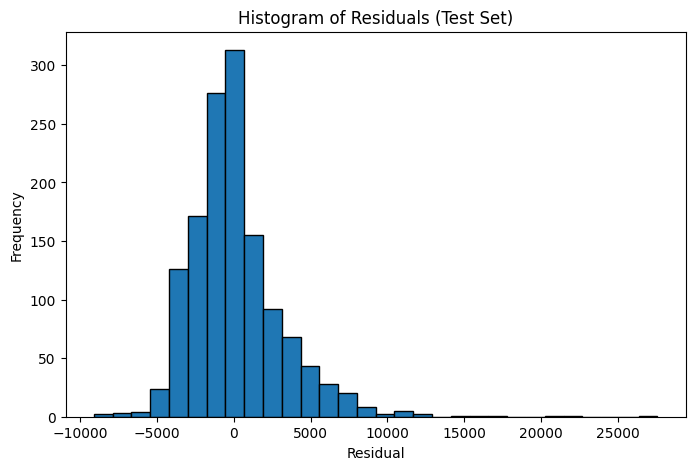

In [13]:
#Histogram of Residuals
residuals_test = (y_test - y_test_pred).values.flatten()

plt.hist(residuals_test, bins=30, edgecolor="black")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Test Set)")
plt.show()

### Interpretation of the Residual Histogram (Test Set)

The histogram of residuals shows how far the model’s predicted prices differ from the actual selling prices. Ideally, residuals in a linear regression model should be centered around zero and form a roughly bell-shaped curve.

In this histogram, though, most residuals cluster around zero, which indicates that the model predicts many vehicle prices reasonably well. However, the distribution has some noticeable characteristics:

- There is a clear **right-skew**, meaning many large positive residuals occur when the model **underpredicts** the true price by several thousand dollars.
- A smaller left tail shows cases where the model **overpredicts** the price.
- The majority of residuals fall between about –4,000 and +4,000 dollars, suggesting that most predictions are within a few thousand dollars of the actual price.
- The long tail extending toward residuals as high as +25,000 dollars reflects rare, unusually high-priced vehicles that a simple linear model cannot estimate perfectly. Because the dataset intentionally includes outliers, these large residuals represent real variation rather than noise.

Overall, the histogram indicates that the model captures general pricing patterns but struggles with unusually expensive vehicles, which introduce higher errors. This behavior is typical for real-world used-car data where condition, trims, options, and other unmeasured factors influence price.


## Checking Homoscedasticity

A scatterplot of predicted values versus residuals assesses the assumption of homoscedasticity, which requires that residuals have constant variance across predictions.

If the plot shows a widening spread as predicted prices increase, this suggests heteroscedasticity.


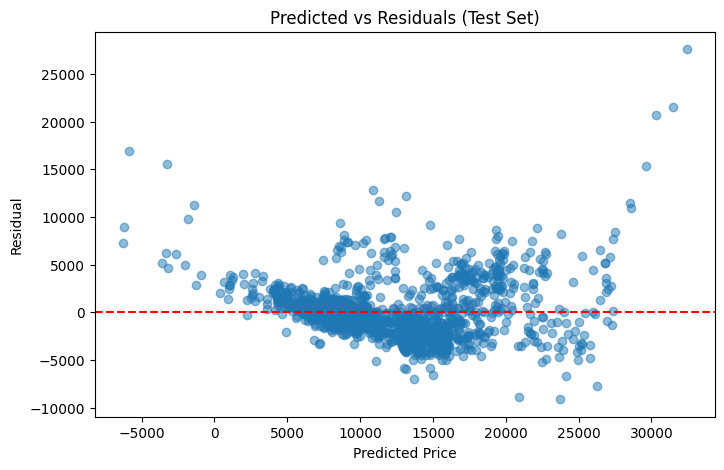

In [14]:
#Homoscedasticity Check (Predicted vs Residuals)
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Predicted vs Residuals (Test Set)")
plt.show()

### Interpretation of Predicted vs Residuals (Test Set)

The scatterplot of predicted prices versus residuals is used to check the assumption of homoscedasticity, which means that the spread of residuals should remain roughly constant across different predicted values.

In this plot, several patterns stand out:

- **Funnel-shaped spread:**  
  Residuals become more spread out as predicted prices increase. At lower predicted prices, most residuals cluster within a narrow range, while higher predicted prices show a much wider band of errors. This indicates **heteroscedasticity**, meaning the model’s accuracy decreases for more expensive vehicles.

- **Systematic underprediction for high-priced cars:**  
  Many large positive residuals appear at predicted prices above 20,000 dollars. This means the model often **underestimates** the actual price of higher-end Toyota vehicles. This makes sense because premium or rare trims may have features not captured by numeric predictors such as age or mileage.

- **Mild overprediction at mid-range prices:**  
  Some negative residuals show up between about 10,000 and 18,000 dollars, indicating occasional overestimates. These are less extreme than the underpredictions, showing that mid-priced cars are modeled more reliably.

- **Random scatter near zero:**  
  For most typical vehicles in the dataset, especially those in the 8,000–18,000 dollar range, residuals are centered around zero and show no clear pattern. This suggests that the model captures the core pricing pattern well.

**Overall:**  
The plot confirms that while the linear regression model performs reliably for the majority of vehicles, it struggles with high-priced outliers. This pattern is expected given the wide range of Toyota models and the decision to keep all outliers. The presence of heteroscedasticity does not invalidate the model but should be noted as a limitation when interpreting its predictions.


## Interpreting Model Coefficients

The coefficients of the linear regression model represent how much the predicted price changes when one predictor increases by one unit, holding all other variables constant.

General interpretations:
- **age**: A negative coefficient means older cars tend to have lower prices.
- **mileage**: A negative coefficient means heavily driven cars sell for less.
- **tax**: A positive or negative coefficient indicates whether vehicles with higher annual tax cost are generally more or less expensive.
- **mpg**: A positive coefficient means more fuel-efficient cars command higher prices.
- **engineSize**: A positive coefficient means vehicles with larger engines tend to cost more.

These relationships help tell a meaningful story about what drives Toyota used-car pricing.


In [15]:
#Coefficients and Interpretation
print("Coefficients:")
for col, coef in zip(X.columns, LinReg.coef_[0]):
    print(f"{col}: {coef:.4f}")

print("\nIntercept:", round(LinReg.intercept_[0], 4))

Coefficients:
age: -828.2304
mileage: -0.0774
tax: -1.4388
mpg: 20.2693
engineSize: 11586.8812

Intercept: 2910.2464


### Interpretation of the Regression Coefficients

The linear regression model estimates how each predictor affects the price of a used Toyota while holding all other variables constant. The coefficients represent the expected change in price for a one-unit increase in each predictor.

**Intercept: 2910.25**  
This is the baseline price of a vehicle when all predictors are zero. Although no real car has zero age, zero mileage, zero mpg, zero tax, and zero engine size, the intercept serves as a mathematical anchor for the model.


### Coefficients for Predictors

**age: –828.23**  
For every additional year of age, the predicted price decreases by about **828 dollars**, assuming mileage, mpg, tax, and engine size remain the same. This is a strong and expected negative relationship, showing that older vehicles tend to lose value steadily.

**mileage: –0.0774**  
Each extra mile reduces the predicted price by about **0.077 dollars**, or roughly **77 dollars per 1,000 miles**. This negative relationship aligns with expectations: more heavily used vehicles sell for less. Although the effect per mile appears small, it becomes meaningful over large mileage differences.

**tax: –1.4388**  
For each additional dollar in annual tax cost, the predicted price decreases by about **1.44 dollars**. This slight negative relationship suggests that higher-tax vehicles may be less desirable or may correspond to less fuel-efficient or older engine types.

**mpg: +20.27**  
For every 1-unit increase in fuel efficiency (miles per gallon), the predicted price increases by about **20 dollars**. This indicates that more fuel-efficient Toyota vehicles tend to command slightly higher prices, though the effect is modest compared to features like age or engine size.

**engineSize: +11,586.88**  
Engine size has the strongest effect in the model. Increasing engine size by 1 liter increases predicted price by approximately **11,587 dollars**, holding other factors constant. This reflects the typical market pattern where larger engines are associated with higher-trim or more powerful vehicles, which sell for significantly more.



### Overall Interpretation

- **Age and mileage** are meaningful negative predictors, showing depreciation and usage impact price in intuitive ways.
- **Engine size** is the strongest positive predictor, indicating that Toyota models with larger engines sit at significantly higher price points.
- **Tax** has a small negative effect and **mpg** has a small positive effect, both contributing but with less influence on the final price.
- These relationships reflect realistic patterns in used-car markets, where vehicle age, engine characteristics, performance, and efficiency all shape pricing.


---
## Conclusion

This project explored how different characteristics of used Toyota vehicles relate to their selling prices using linear regression. The dataset included a wide variety of models with a broad range of ages, mileages, engine sizes, tax categories, and fuel efficiencies. The initial descriptive statistics and histograms showed substantial natural variation and confirmed the presence of outliers, especially among high-priced or high-mileage vehicles. These outliers were intentionally retained so the model could reflect real-world pricing instead of simplified or filtered data.

The correlation heatmap highlighted the strongest linear relationships in the dataset. Engine size had a strong positive association with price, while age and mileage showed clear negative relationships. Tax and mpg were weaker predictors, although they still contributed meaningful information. The strong correlation between age and mileage also showed that some predictors overlap, which is common in automotive data and can influence the interpretability of individual coefficients.

The regression model performed well overall, achieving a training R² of 0.7654 and a test R² of 0.7569. This means the model explained roughly 76 percent of the variation in used-car prices. The training and test RMSE values were very close (about 3,077 dollars for training and 3,112 dollars for testing), indicating that the model generalizes well and does not appear to overfit. The remaining variation reflects differences the model cannot capture using numeric predictors alone, such as trim level, optional features, condition, or market demand.

The residual histogram showed that most predictions were reasonably close to the true prices, with many falling within a few thousand dollars of the actual value. However, the distribution was right-skewed, revealing that the model occasionally underpredicted expensive vehicles by larger amounts. This pattern was reinforced by the predicted-versus-residuals scatterplot, which displayed heteroscedasticity. Residuals became more spread out as predicted prices increased, meaning the model is more accurate for typical vehicles and less consistent for higher-priced ones. This is expected since expensive or rare Toyota models have more unpredictable pricing behavior.

The coefficients of the regression model aligned well with real-world expectations. Age and mileage both had negative effects, and engine size was by far the strongest positive predictor. Fuel efficiency had a small positive impact, while tax showed a mild negative impact on price. These relationships paint a realistic picture of what drives pricing in used-car markets: newer cars with lower mileage and larger engines tend to command higher prices, while heavily used or less efficient models sell for less.

Overall, the linear regression model did a strong job capturing the primary pricing patterns within the dataset. While it cannot fully account for the complexity and variability of used-car markets, especially for premium or unusual vehicles, the model provides reliable insights into how the main vehicle characteristics influence price. The analysis successfully demonstrates how numerical features can be used to understand and predict Toyota used-car values, and it highlights the trade-offs that come with using simple, interpretable models on real-world data.
